In [179]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
def normalization(x):
  return (x - np.min(x)) / (np.max(x) - np.min(x))

In [181]:
#1-init
x = np.array([
    [100, 2, 1, 10, 1],
    [120, 3, 2, 5, 2],
    [150, 4, 3, 20, 1],
    [200, 5, 3, 8, 2],
    [250, 5, 4, 3, 3]
])
y = np.array([[200], [250], [320], [400], [500]])
x_norm = normalization(x)

In [182]:
#2-calc predict
def predict(x,w,b):
  return np.dot(x,w) + b

In [183]:
#3-calc cost function
def compute_cost(y,y_pred):
  m=len(y)
  return np.sum((y - y_pred) ** 2)/(2*m)

In [184]:
#4-calc gradient
def compute_gradient(x,y,y_pred):
  m=len(y)
  dw = np.sum(x*(y_pred - y)) / m
  db = np.sum((y_pred - y)) / m
  return dw,db

In [185]:
#5-calc gradient descent
def update(w,b,dw,db,lr):
  w-=lr*dw
  b-=lr*db
  return w,b

# BATCH

In [186]:
def batch_gradient_descent(x, y, lr=0.1, n_iters=100):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0
    w_hist=[]
    for i in range(n_iters):
        y_pred = predict(x, w, b)
        cost = compute_cost(y, y_pred)
        dw, db = compute_gradient(x, y, y_pred)
        w, b = update(w, b, dw, db, lr)
        w_hist.append(w[0][0])
    return w, b
    #take one epoch
    # more in small data
    # can be in saddle point

---

# STOCHASTIC

In [187]:
def stochastic_gradient_descent(x, y, lr=0.1, n_iters=100):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0
    for epoch in range(n_iters):
        for i in range(m): #take sample
            xi = x[i:i+1]#sample
            yi = y[i:i+1]#target
            y_pred = predict(xi, w, b)
            dw, db = compute_gradient(xi, yi, y_pred)
            w, b = update(w, b, dw, db, lr)
    return w, b
    #take m epochs
    #never be in saddle point beacuse its noisy data
    #take one sample and calc gradient

---

# MINI_BATCH

In [188]:
def mini_batch_gradient_descent(x, y, lr=0.1, n_iters=100, batch_size=2):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0
    cost_hist=[]
    for epoch in range(n_iters):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        #shuffle in data to prevent bias
        # [1,1,1,1,2,2]
        #model train of 1 and biased so we need to use permutation

        for i in range(0, m, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            y_pred = predict(x_batch, w, b)
            dw, db = compute_gradient(x_batch, y_batch, y_pred)
            w, b = update(w, b, dw, db, lr)
            cost_hist.append(compute_cost(y,predict(x,w,b)))
    return cost_hist
    #divide into batch_size more speed than batch (stable)
    #more in deep_learning and big data

---

# MOMENTUM

In [189]:
def momentum_gradient_descent(x, y, lr=0.1, n_iters=100, gamma=0.9):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0
    v_w, v_b = 0, 0
    w_hist=[]
    for epoch in range(n_iters):
        y_pred = predict(x, w, b)
        dw, db = compute_gradient(x, y, y_pred)
        v_w = gamma * v_w + lr * dw
        v_b = gamma* v_b + lr * db
        w -= lr * v_w
        b -= lr * v_b
        w_hist.append(w[0][0])
    return w_hist
    #solve noisy data
    #solve vanishing in deep_learning (gradient very small)

In [190]:
def generate_noisy_data():
    np.random.seed(42)
    x = 2 * np.random.rand(100, 1)
    y = 4* x+ np.random.randn(100, 1) * 2  # noisy y
    return x, y

In [191]:
def batch_gradient_descent(x, y, lr=0.1, n_iters=100):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0
    w_hist=[]
    for i in range(n_iters):
        y_pred = predict(x, w, b)
        cost = compute_cost(y, y_pred)
        dw, db = compute_gradient(x, y, y_pred)
        w, b = update(w, b, dw, db, lr)
        w_hist.append(w[0][0])
    return w_hist

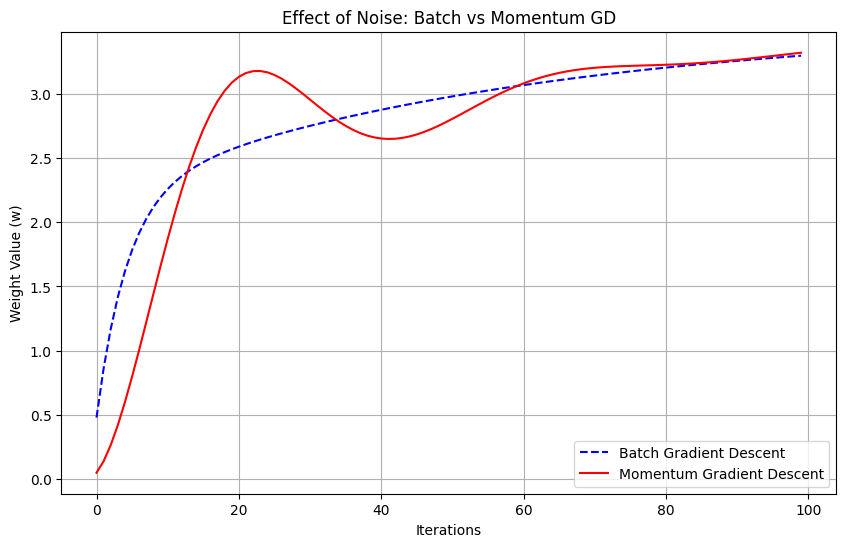

In [192]:
x, y = generate_noisy_data()
w_batch = batch_gradient_descent(x, y)
w_momentum = momentum_gradient_descent(x, y)

plt.figure(figsize=(10, 6))
plt.plot(w_batch, label='Batch Gradient Descent', color='blue', linestyle='--')
plt.plot(w_momentum, label='Momentum Gradient Descent', color='red')
plt.xlabel('Iterations')
plt.ylabel('Weight Value (w)')
plt.title('Effect of Noise: Batch vs Momentum GD')
plt.legend()
plt.grid(True)
plt.show()


# NAG

In [193]:
def nag(x, y, alpha=0.1, gamma=0.9, n_iters=100):
    theta = 0
    bias = 0
    v_theta = 0
    v_bias = 0
    theta_hist = []
    for _ in range(n_iters):
        # 1-calc theta temp
        temp_theta = theta - gamma * v_theta
        temp_bias = bias - gamma * v_bias

        y_pred = predict(x, temp_theta, temp_bias)
        #2-calc gradient
        dtheta, dbias = compute_gradient(x, y, y_pred)
        #3-calc v
        v_theta = gamma * v_theta + alpha * dtheta
        v_bias = gamma * v_bias + alpha * dbias
        #4-update param
        theta -= v_theta
        bias -= v_bias
        theta_hist.append(theta)

    return theta_hist

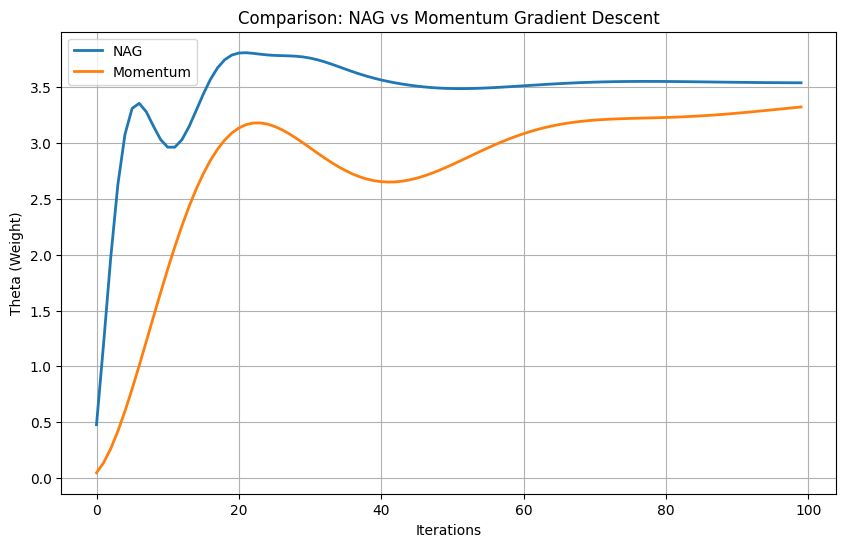

In [194]:
nag_hist = nag(x, y)
momentum_hist = momentum_gradient_descent(x, y)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(nag_hist, label="NAG", linewidth=2)
plt.plot(momentum_hist, label="Momentum", linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Theta (Weight)")
plt.title("Comparison: NAG vs Momentum Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()
#more stable
#less noisy

---

#ADAPTIVE

In [195]:
def adagrad(X, y, alpha=0.01, n_iters=1000, epsilon=1e-8):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]#add column bias
    theta = np.zeros((n + 1, 1))
    v = np.zeros((n + 1, 1))
    cost_hist=[]
    for _ in range(n_iters):
        grad = (1/m) * X_b.T.dot(X_b.dot(theta) - y)#calc gradient
        v += grad ** 2#calc v
        theta -= (alpha / (np.sqrt(v) + epsilon)) * grad#calc theta+1
        cost_hist.append(compute_cost(y,predict(X,theta[1:],theta[0])))
    return cost_hist
    #change lerning rate every time for every feature

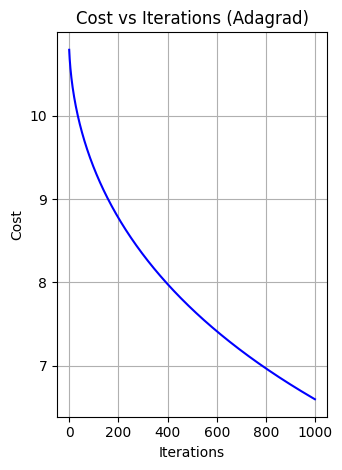

In [196]:
cost_history = adagrad(x, y)
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title("Cost vs Iterations (Adagrad)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)

plt.tight_layout()
plt.show()

---

# RMS PROP

In [197]:
def rmsprop_gradient_descent(x, y, lr=0.01, n_iters=1000, beta=0.98, epsilon=1e-8):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0
    v_w = np.zeros((n, 1))
    v_b = 0
    cost_hist=[]
    for epoch in range(n_iters):
        y_pred = predict(x, w, b)
        dw, db = compute_gradient(x, y, y_pred)
        v_w = beta * v_w + (1 - beta) * (dw ** 2)
        v_b = beta * v_b + (1 - beta) * (db ** 2)
        w -= (lr / (np.sqrt(v_w) + epsilon)) * dw
        b -= (lr / (np.sqrt(v_b) + epsilon)) * db
        cost_hist.append(compute_cost(y,predict(x,w,b)))
    return cost_hist


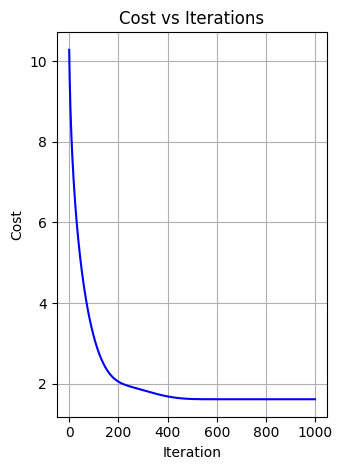

In [199]:
cost_history = rmsprop_gradient_descent(x, y)
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()

---

# ADAM

In [200]:
def adam(x, y, lr=0.01, n_iters=100, gamma=0.9, beta=0.999, epsilon=1e-8):
    m, n = x.shape
    w = np.zeros((n, 1))
    b = 0

    mw = np.zeros((n, 1))  # First moment (mean of gradients)
    vw = np.zeros((n, 1))  # Second moment (squared gradients)

    mb = 0
    vb = 0
    cost_hist=[]
    for t in range(1, n_iters + 1):
        y_pred = predict(x, w, b)
        dw, db = compute_gradient(x, y, y_pred)

        # Update biased first moment estimate
        mw = gamma * mw + (1 - gamma) * dw
        mb = gamma * mb + (1 - gamma) * db

        # Update biased second raw moment estimate
        vw = beta * vw + (1 - beta) * (dw ** 2)
        vb = beta * vb + (1 - beta) * (db ** 2)

        # Compute bias-corrected first and second moment
        mw_corr = mw / (1 - gamma ** t)
        vw_corr = vw / (1 - beta ** t)

        mb_corr = mb / (1 - gamma ** t)
        vb_corr = vb / (1 - beta ** t)

        # Update parameters
        w -= lr * mw_corr / (np.sqrt(vw_corr) + epsilon)
        b -= lr * mb_corr / (np.sqrt(vb_corr) + epsilon)
        cost_hist.append(compute_cost(y,predict(x,w,b)))

    return cost_hist


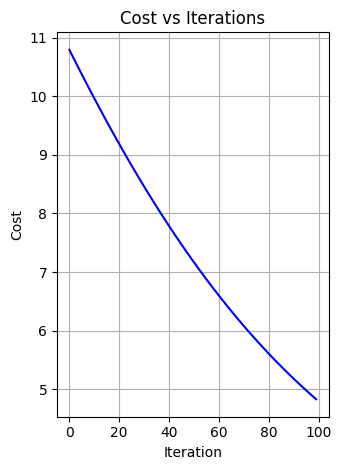

In [201]:
cost_history = adam(x, y)
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()

---

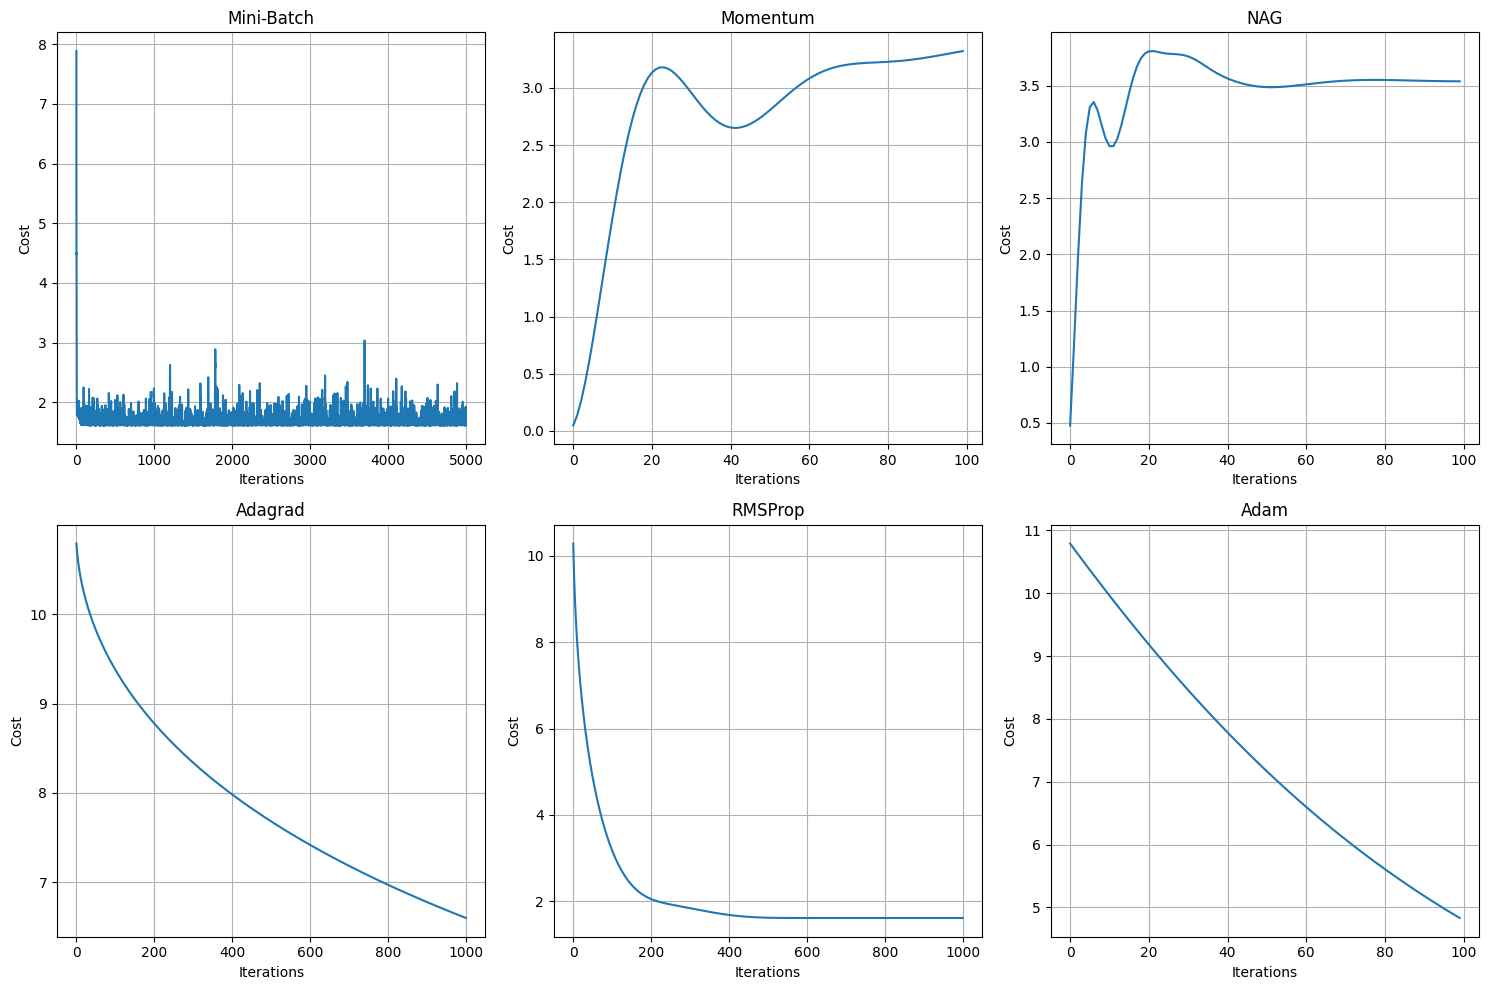

In [203]:
optimizers = {
    'Mini-Batch': mini_batch_gradient_descent(x, y),
    'Momentum': momentum_gradient_descent(x, y),
    'NAG': nag(x, y),
    'Adagrad': adagrad(x, y),
    'RMSProp': rmsprop_gradient_descent(x, y),
    'Adam': adam(x, y)
}

plt.figure(figsize=(15, 10))

for i, (name, cost_list) in enumerate(optimizers.items(), 1):
    plt.subplot(2, 3, i)
    plt.plot(cost_list)
    plt.title(name)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)

plt.tight_layout()
plt.show()